# PART ONE

In [129]:
import jieba
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'PingFang HK'
# 声明数据文件路径
data = './data/'
FilePath = './inf.txt'
filter1='----〖新语丝电子文库(www.xys.org)〗'
filter2='本书来自www.cr173.com免费txt小说下载站'
filter3='更多更新免费电子书请关注www.cr173.com'

In [158]:
def FileList(Path):
    with open(Path, 'r', encoding='gbk') as Filelist:
        file1 = Filelist.readline()
        nameList = file1.split(',')  # inf.txt用','隔开文件
        List = map(lambda file: os.path.join(data, file + '.txt'), nameList)
    return List

In [159]:
fileList = FileList(FilePath) 

In [160]:
def IsChinese(wordsmap):
        for char in wordsmap:
            if '\u4e00' <= char <= '\u9fff':
                continue
            else:
                return False
        return True

def Countword(Path, wordsmap):
    # 检查单词是否均为中文
    with open(Path, 'r',encoding='gb18030') as File:
        txt = File.read()
        print(txt)
        txt = txt.replace(filter1, '')
        txt = txt.replace(filter2, '')
        txt = txt.replace(filter3, '')
        words = jieba.lcut(txt)  # 精确模式分词
        for word in words:
            if IsChinese(word):  # 过滤掉所有非中文词（包括标点）
                wordsmap[word] = wordsmap.get(word, 0) + 1

In [162]:
count = {}
for file in fileList:
    Countword(file, count)

In [244]:
def show(CntMap):
    x = np.linspace(1, 160000, 1000)  # 生成从 1 到 10 的等间距数据
    y = 80000 / x  # 计算反比例值
    wordList = list(CntMap.items())
    wordList.sort(key=lambda x: x[1], reverse=True)
    cntList = list(map(lambda x: x[1], wordList))
    rankList = [i for i in range(len(cntList))]
    # 显示并保存统计图
    '''
    #plt.subplot(2, 1, 1)  # 子图布局为2行1列，当前为第1个子图
    plt.scatter(rankList, cntList, color='green', label='数据')
    plt.plot(x, y, color='red', linewidth=3,linestyle='-')
    plt.xlabel('排名')
    plt.ylabel('词频率')
    plt.title('齐普夫定律', fontsize=18)
    plt.savefig('./齐普夫定律.jpg')
    '''
    #plt.subplot(2, 1, 2)  # 子图布局为2行1列，当前为第2个子图
    plt.semilogx(rankList, cntList, color='green', label='数据')  # 绘制以对数刻度为x轴的图像
    plt.plot(x, y, color='red', linewidth=3,linestyle='-')
    plt.xlabel('排名-log')
    plt.ylabel('词频率-log')
    plt.title('齐普夫定律-对数', fontsize=18)
    plt.savefig('./齐普夫定律-对数.jpg')
    # 调整子图之间的间距
    #plt.tight_layout()
    #plt.legend('结果')
    #plt.savefig('./齐普夫定律.jpg')
    plt.show()

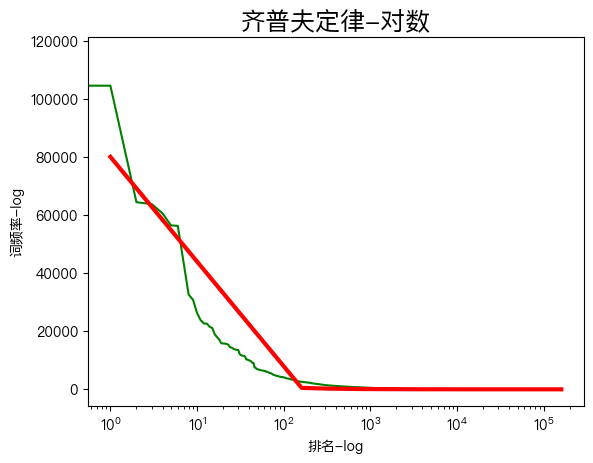

In [245]:
show(cntMap)

# PART TWO

In [231]:
# -*- coding: utf-8 -*-
import math

import jieba
import os
import csv

# 声明数据文件路径
data = './data/'
FilePath = 'inf.txt'
stopPath =  'cn_stopwords.txt'


class Entropy(object):
    def __init__(self, name, stopWordFilePath):
        self.name = name  # 文件名
        self.data = None  # 原始char列表
        self.chars = []  # 单字列表
        self.words = []  # 单词列表
        # 读取stop words
        with open(stopWordFilePath, 'r', encoding='utf-8') as stopWordFile:
            self.stopWords = []
            for line in stopWordFile.readlines():
                self.stopWords.append(line.strip())  # 去掉回车

    # 读取文件，读入data，并进行分词
    def readFile(self, filePath):
        txt = open(filePath, 'r', encoding='gb18030')
        rawTxt = txt.read()
        rawTxt = rawTxt.replace(filter1, '')
        rawTxt = rawTxt.replace(filter2, '')
        self.data = rawTxt.replace(filter3, '')
        for ch in self.data:
            if ch not in self.stopWords and (not ch.isspace()):
                self.chars.append(ch)
        # 分词之后，按词存储
        words = jieba.lcut(self.data)
        for word in words:
            if word not in self.stopWords:
                self.words.append(word)
    def FrequencyCount(self, mode):
        cntMap = {}
        unitSeq = None
        if mode == "char":
            unitSeq = self.chars
        elif mode == "word":
            unitSeq = self.words
        for unit in unitSeq:
            cntMap[unit] = cntMap.get(unit, 0) + 1
        return cntMap

    # 按照unigram模型计算平均信息熵
    def entropy(self, mode):
        singleUnitFreqMap = self.FrequencyCount(mode)
        #print(singleUnitFreqMap)
        length = len(self.words if mode == "word" else self.chars)
        entropy = 0
        for item in singleUnitFreqMap.items():
            freqPr = item[1] / length
            entropy += -1.0 * freqPr * math.log(freqPr, 2)
        print("For {}, Unigram Entropy in mode {} is: {}".format(self.name, mode, entropy))
        return entropy

In [232]:
filePathList = list(FileList(FilePath))

In [233]:
EntropyMaps = []
for filePath in filePathList:
    print(filePath)
    entropy = Entropy(os.path.basename(filePath), stopPath)
    #print(entropy.stopWords)
    entropy.readFile(filePath)
    #print(entropy.words)
    res = {
            '文件名': entropy.name,
            'Unigram-char': entropy.entropy('char'),
            'Unigram-word': entropy.entropy('word')
        }
    EntropyMaps.append(res)


./data/白马啸西风.txt
For 白马啸西风.txt, Unigram Entropy in mode char is: 9.22508843800379
For 白马啸西风.txt, Unigram Entropy in mode word is: 9.53970390498186
./data/碧血剑.txt
For 碧血剑.txt, Unigram Entropy in mode char is: 9.75443296928964
For 碧血剑.txt, Unigram Entropy in mode word is: 12.719245583752095
./data/飞狐外传.txt
For 飞狐外传.txt, Unigram Entropy in mode char is: 9.624870473005096
For 飞狐外传.txt, Unigram Entropy in mode word is: 12.454744754635295
./data/连城诀.txt
For 连城诀.txt, Unigram Entropy in mode char is: 9.51522521503827
For 连城诀.txt, Unigram Entropy in mode word is: 11.641213954513589
./data/鹿鼎记.txt
For 鹿鼎记.txt, Unigram Entropy in mode char is: 9.658504947642212
For 鹿鼎记.txt, Unigram Entropy in mode word is: 12.101716918166355
./data/三十三剑客图.txt
For 三十三剑客图.txt, Unigram Entropy in mode char is: 10.006702280111217
For 三十三剑客图.txt, Unigram Entropy in mode word is: 12.48086678409849
./data/射雕英雄传.txt
For 射雕英雄传.txt, Unigram Entropy in mode char is: 9.746818537989379
For 射雕英雄传.txt, Unigram Entropy in mode w

In [234]:
EntropyMaps

[{'文件名': '白马啸西风.txt',
  'Unigram-char': 9.22508843800379,
  'Unigram-word': 9.53970390498186},
 {'文件名': '碧血剑.txt',
  'Unigram-char': 9.75443296928964,
  'Unigram-word': 12.719245583752095},
 {'文件名': '飞狐外传.txt',
  'Unigram-char': 9.624870473005096,
  'Unigram-word': 12.454744754635295},
 {'文件名': '连城诀.txt',
  'Unigram-char': 9.51522521503827,
  'Unigram-word': 11.641213954513589},
 {'文件名': '鹿鼎记.txt',
  'Unigram-char': 9.658504947642212,
  'Unigram-word': 12.101716918166355},
 {'文件名': '三十三剑客图.txt',
  'Unigram-char': 10.006702280111217,
  'Unigram-word': 12.48086678409849},
 {'文件名': '射雕英雄传.txt',
  'Unigram-char': 9.746818537989379,
  'Unigram-word': 12.352769399162213},
 {'文件名': '神雕侠侣.txt',
  'Unigram-char': 9.66276948494614,
  'Unigram-word': 12.28622561261935},
 {'文件名': '书剑恩仇录.txt',
  'Unigram-char': 9.75233267606959,
  'Unigram-word': 12.625325739143207},
 {'文件名': '天龙八部.txt',
  'Unigram-char': 9.78223920848531,
  'Unigram-word': 12.560341968974678},
 {'文件名': '侠客行.txt',
  'Unigram-char':

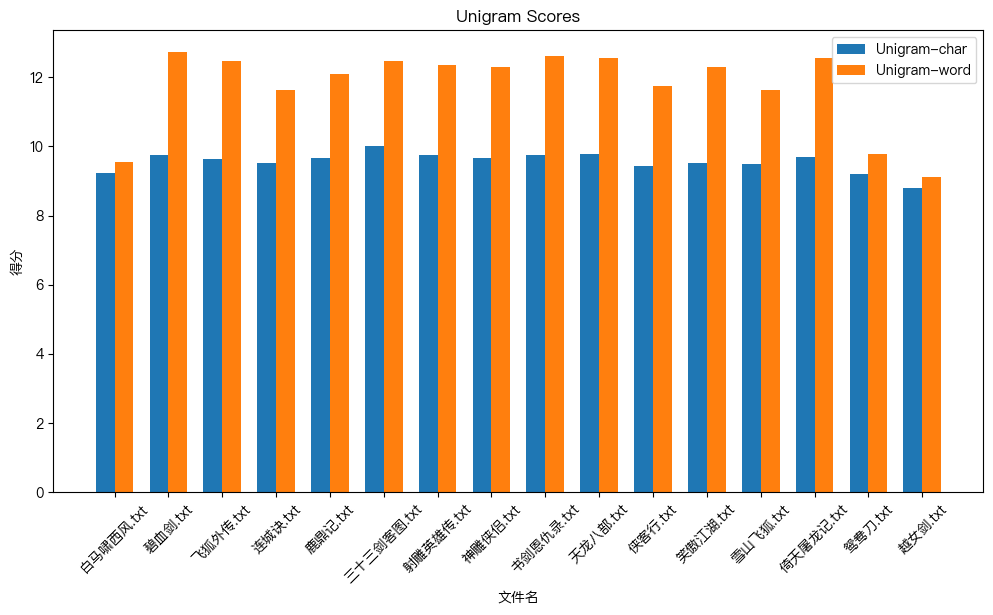

In [239]:
# 提取数据
file_names = [item['文件名'] for item in EntropyMaps]
unigram_char_scores = [item['Unigram-char'] for item in EntropyMaps]
unigram_word_scores = [item['Unigram-word'] for item in EntropyMaps]

# 设置图形大小
plt.figure(figsize=(12, 6))

# 调整柱子的宽度
width = 0.35

# 计算柱状图的位置
positions = np.arange(len(file_names))

# 绘制柱状图
plt.bar(positions - width/2, unigram_char_scores, width=width, label='Unigram-char')
plt.bar(positions + width/2, unigram_word_scores, width=width, label='Unigram-word')

# 设置标题和标签
plt.title('Unigram Scores')
plt.xlabel('文件名')
plt.ylabel('得分')

# 设置图例
plt.legend()

# 设置x轴刻度标签
plt.xticks(positions, file_names, rotation=45)
plt.savefig('./Unigram统计柱状图.jpg')
# 显示图形
plt.show()